## Problem Statement

In this example we are interested to find how variables such as GRE (Graduate Record Exam scores), GPA (grade point average) and prestige of the undergraduate institution, effect admission into graduate school. The response variable, admit/don’t admit, is a binary variable.

I am going to solve this problem using logistic regression. Let's see how well our model performs!

## Importing required packages

In [2]:
# First of all let us import all the packages which we would require for this task

import pandas as pd
import matplotlib.pyplot as pl
from sklearn import linear_model
from sklearn import cross_validation
from sklearn import metrics

## Loading the datasets

In [3]:
''' Here I am importing the datasets directly from its URL address. We can also import datasets from our local file 
    directory on our system '''

df = pd.read_csv("https://stats.idre.ucla.edu/stat/data/binary.csv")

In [4]:
# Let us see what all different features are present in our dataset by printing the top 5 rows or head of the dataset

print("\nHead of the dataset is:\n")
print df.head()


Head of the dataset is:

   admit  gre   gpa  rank
0      0  380  3.61     3
1      1  660  3.67     3
2      1  800  4.00     1
3      1  640  3.19     4
4      0  520  2.93     4


Here, GRE score, GPA obtained during undergraduation, and rank (prestige of undergraduate college) are predictor variables or input variables for our model. Institutions with a rank of 1 have the highest prestige, while those with a rank of 4 have the lowest.

While admit is binary target variable or output vaiable. It indicates whether or not a candidate was admitted our not.

In [5]:
''' Now let us have a look at the description of the dataset, i.e. minimum value, maximum value, standard deviation and 
    other values for each field of the dataset '''

print ("\nDescription of dataset is as follows:\n")
print df.describe()


Description of dataset is as follows:

            admit         gre         gpa       rank
count  400.000000  400.000000  400.000000  400.00000
mean     0.317500  587.700000    3.389900    2.48500
std      0.466087  115.516536    0.380567    0.94446
min      0.000000  220.000000    2.260000    1.00000
25%      0.000000  520.000000    3.130000    2.00000
50%      0.000000  580.000000    3.395000    2.00000
75%      1.000000  660.000000    3.670000    3.00000
max      1.000000  800.000000    4.000000    4.00000


## Performing various data cleaning operations

In [6]:
# First let us find our how may rows and columns are present in the dataset initially by printing its shape

print ("\nInitially, Shape of dataset is (rows, columns): " + str(df.shape))


Initially, Shape of dataset is (rows, columns): (400, 4)


In [7]:
# Now, let us check if there are any blank tuples or records present in dataset by finding out total null fields

print df.isnull().sum()

admit    0
gre      0
gpa      0
rank     0
dtype: int64


In [8]:
# Further we drop duplicate records (if any) present in dataset to remove data redundency

data = df.drop_duplicates()
print ("Shape of dataset after dropping duplicate records is (rows, columns): " + str(data.shape))

Shape of dataset after dropping duplicate records is (rows, columns): (395, 4)


## Data represntation using histograms

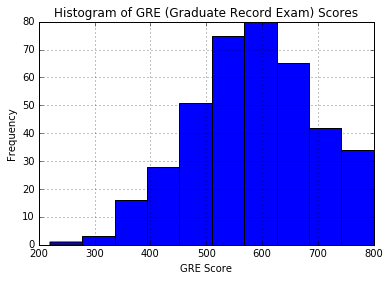

In [10]:
data.gre.hist()
pl.title("Histogram of GRE (Graduate Record Exam) Scores")
pl.xlabel("GRE Score")
pl.ylabel("Frequency")
pl.show()

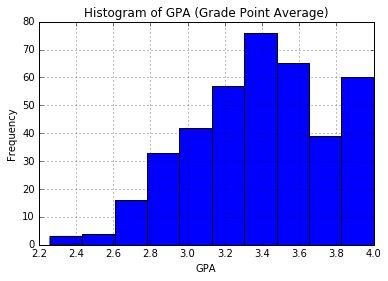

In [11]:
data.gpa.hist()
pl.title("Histogram of GPA (Grade Point Average)")
pl.xlabel("GPA")
pl.ylabel("Frequency")
pl.show()

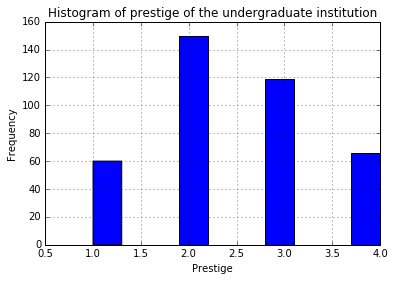

In [12]:
''' Here, I am renaming field rank to prestige as rank is an inbuilt function and there are some conflicts while plotting 
    histogram using field name as rank '''

data.columns = ['admit', 'gre', 'gpa', 'prestige']
data.prestige.hist()
pl.title("Histogram of prestige of the undergraduate institution")
pl.xlabel("Prestige")
pl.ylabel("Frequency")
pl.show()

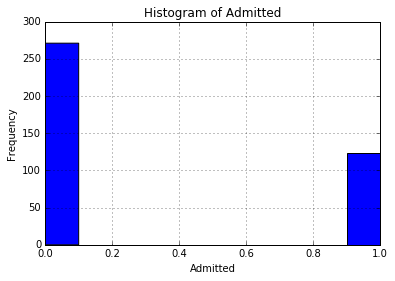

In [13]:
data.admit.hist()
pl.title("Histogram of Admitted")
pl.xlabel("Admitted")
pl.ylabel("Frequency")
pl.show()

## Splitting dataset into train data and test data

In [14]:
predictor_cols = ['gre', 'gpa', 'prestige']
target_cols = ['admit']

x_train, x_test, y_train, y_test = cross_validation.train_test_split(data[predictor_cols], data[target_cols], test_size=0.40)

## Training our algorithm

In [16]:
logClassifier = linear_model.LogisticRegression()

logClassifier.fit(x_train, y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)

## Predicting outcome using our model

In [17]:
predicted = logClassifier.predict(x_test)

## Finding accuracy

In [18]:
print ("Accuracy of model is: ")
print metrics.accuracy_score(y_test, predicted)

Accuracy of model is: 
0.746835443038
